In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('C:/Users/risha/PycharmProjects/ML&AI Training/College_Data.csv')
df.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df.isnull().sum()

Name           0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F_Undergrad    0
P_Undergrad    0
Outstate       0
Room_Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S_F_Ratio      0
perc_alumni    0
Expend         0
Grad_Rate      0
dtype: int64

In [4]:
for i in df.columns:
    print(i,len(df[i].unique()))

Name 777
Private 2
Apps 711
Accept 693
Enroll 581
Top10perc 82
Top25perc 89
F_Undergrad 714
P_Undergrad 566
Outstate 640
Room_Board 553
Books 122
Personal 294
PhD 78
Terminal 65
S_F_Ratio 173
perc_alumni 61
Expend 744
Grad_Rate 81


In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


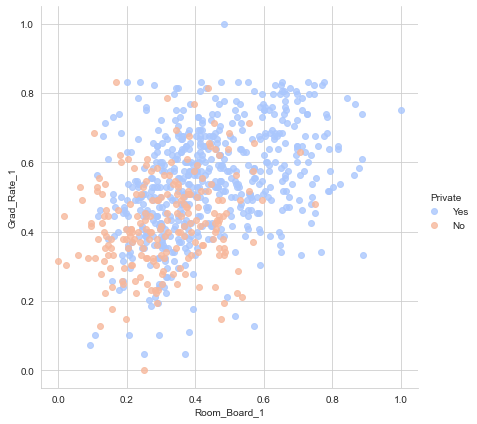

In [6]:
df1 = df
scalar = MinMaxScaler()
scalar.fit(df[['Grad_Rate']])
df['Grad_Rate_1'] = scalar.transform(df[['Grad_Rate']])
scalar.fit(df[['Room_Board']])
df['Room_Board_1'] = scalar.transform(df[['Room_Board']])

sns.set_style('whitegrid')
sns.lmplot(x='Room_Board_1',y='Grad_Rate_1',data=df,hue='Private',palette='coolwarm',height=6,fit_reg=False)

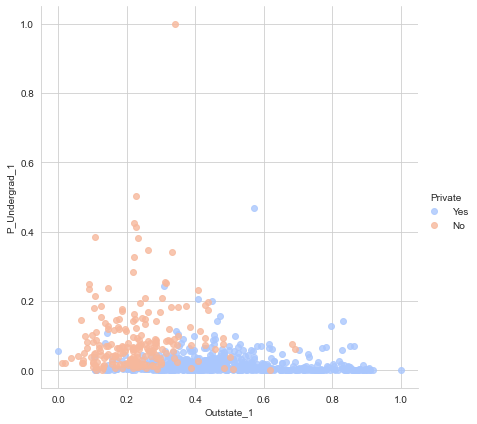

In [7]:
scalar.fit(df[['Outstate']])
df['Outstate_1'] = scalar.transform(df[['Outstate']])
scalar.fit(df[['P_Undergrad']])
df['P_Undergrad_1'] = scalar.transform(df[['P_Undergrad']])
sns.set_style('whitegrid')
sns.lmplot(x='Outstate_1',y='P_Undergrad_1',data=df, hue='Private',
           palette='coolwarm',height=6,fit_reg=False)

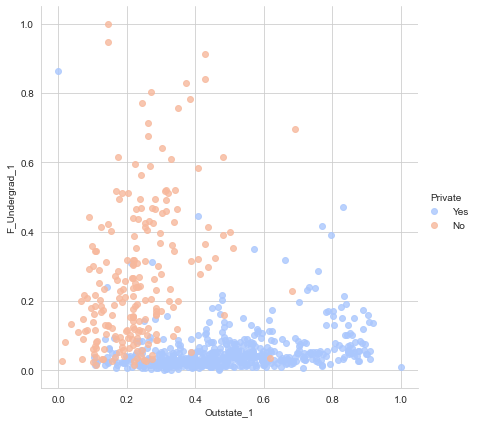

In [8]:
scalar.fit(df[['F_Undergrad']])
df['F_Undergrad_1'] = scalar.transform(df[['F_Undergrad']])
sns.set_style('whitegrid')
sns.lmplot(x='Outstate_1',y='F_Undergrad_1',data=df, hue='Private',
           palette='coolwarm',height=6,fit_reg=False)

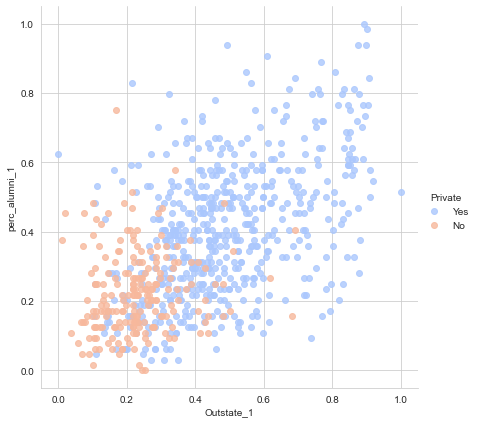

In [9]:
scalar.fit(df[['perc_alumni']])
df['perc_alumni_1'] = scalar.transform(df[['perc_alumni']])
sns.set_style('whitegrid')
sns.lmplot(x='Outstate_1',y='perc_alumni_1',data=df, hue='Private',
           palette='coolwarm',height=6,fit_reg=False)

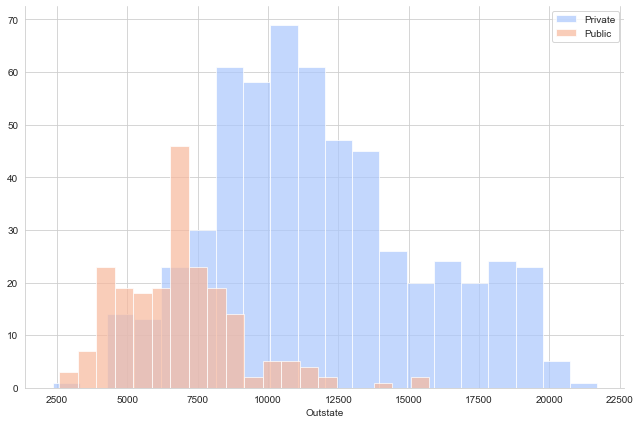

In [10]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df,hue='Private',palette='coolwarm',height=6,aspect=1.5)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)
plt.legend(labels=['Private','Public'])


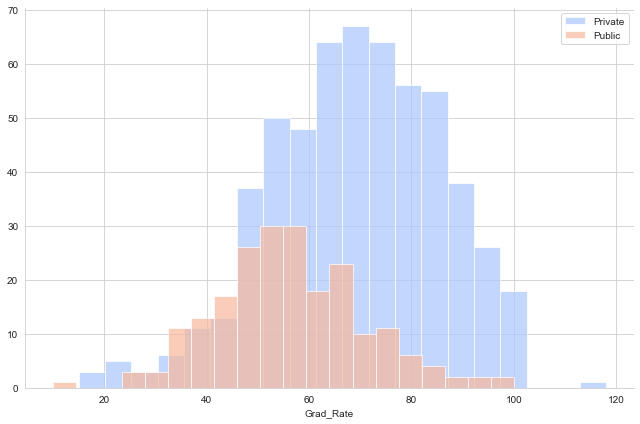

In [11]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df,hue='Private',palette='coolwarm',height=6,aspect=1.5)
g = g.map(plt.hist,'Grad_Rate',bins=20,alpha=0.7)
plt.legend(labels=['Private','Public'])

In [12]:
df.loc[df['Private'] == 'Yes', 'Private'] = 0
df.loc[df['Private'] == 'No', 'Private'] = 1
df

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,...,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Grad_Rate_1,Room_Board_1,Outstate_1,P_Undergrad_1,F_Undergrad_1,perc_alumni_1
0,Abilene Christian University,0,1660,1232,721,23,52,2885,537,7440,...,18.1,12,7041,60,0.462963,0.239596,0.263430,0.024548,0.087164,0.187500
1,Adelphi University,0,2186,1924,512,16,29,2683,1227,12280,...,12.2,16,10527,56,0.425926,0.736129,0.513430,0.056148,0.080752,0.250000
2,Adrian College,0,1428,1097,336,22,50,1036,99,11250,...,12.9,30,8735,54,0.407407,0.310530,0.460227,0.004488,0.028473,0.468750
3,Agnes Scott College,0,417,349,137,60,89,510,63,12960,...,7.7,37,19016,59,0.453704,0.578499,0.548554,0.002839,0.011776,0.578125
4,Alaska Pacific University,0,193,146,55,16,44,249,869,7560,...,11.9,2,10922,15,0.046296,0.368852,0.269628,0.039753,0.003492,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,1,2197,1515,543,4,26,3089,2029,6797,...,21.0,14,4469,40,0.277778,0.334174,0.230217,0.092878,0.093639,0.218750
773,Xavier University,0,1959,1805,695,24,47,2849,1107,11520,...,13.3,31,9189,83,0.675926,0.501261,0.474174,0.050653,0.086021,0.484375
774,Xavier University of Louisiana,0,2097,1915,695,34,61,2793,166,6900,...,14.4,20,8323,49,0.361111,0.381463,0.235537,0.007557,0.084243,0.312500
775,Yale University,0,10705,2453,1317,95,99,5217,83,19840,...,5.8,49,40386,99,0.824074,0.745586,0.903926,0.003755,0.161186,0.765625


In [13]:
df1 = df1.drop(['Name','Private'], axis  = 1)
df1

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,...,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Grad_Rate_1,Room_Board_1,Outstate_1,P_Undergrad_1,F_Undergrad_1,perc_alumni_1
0,1660,1232,721,23,52,2885,537,7440,3300,450,...,18.1,12,7041,60,0.462963,0.239596,0.263430,0.024548,0.087164,0.187500
1,2186,1924,512,16,29,2683,1227,12280,6450,750,...,12.2,16,10527,56,0.425926,0.736129,0.513430,0.056148,0.080752,0.250000
2,1428,1097,336,22,50,1036,99,11250,3750,400,...,12.9,30,8735,54,0.407407,0.310530,0.460227,0.004488,0.028473,0.468750
3,417,349,137,60,89,510,63,12960,5450,450,...,7.7,37,19016,59,0.453704,0.578499,0.548554,0.002839,0.011776,0.578125
4,193,146,55,16,44,249,869,7560,4120,800,...,11.9,2,10922,15,0.046296,0.368852,0.269628,0.039753,0.003492,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,...,21.0,14,4469,40,0.277778,0.334174,0.230217,0.092878,0.093639,0.218750
773,1959,1805,695,24,47,2849,1107,11520,4960,600,...,13.3,31,9189,83,0.675926,0.501261,0.474174,0.050653,0.086021,0.484375
774,2097,1915,695,34,61,2793,166,6900,4200,617,...,14.4,20,8323,49,0.361111,0.381463,0.235537,0.007557,0.084243,0.312500
775,10705,2453,1317,95,99,5217,83,19840,6510,630,...,5.8,49,40386,99,0.824074,0.745586,0.903926,0.003755,0.161186,0.765625


In [14]:
km = KMeans(n_clusters=2)
yp = km.fit_predict(df1)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
df1['cluster'] = yp

In [16]:
df['Private'] = df.Private.astype("category").cat.codes
print(confusion_matrix(df.Private, yp))


[[ 34 531]
 [ 74 138]]


In [17]:
print(classification_report(df.Private, yp))

              precision    recall  f1-score   support

           0       0.31      0.06      0.10       565
           1       0.21      0.65      0.31       212

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [18]:
df2 = df1[df1.cluster==0]
df3 = df1[df1.cluster==1]

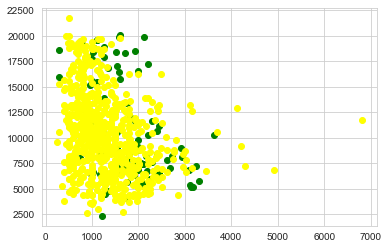

In [19]:
plt.scatter(df2['Personal'],df2['Outstate'],color='green')
plt.scatter(df3['Personal'],df3['Outstate'],color='yellow')

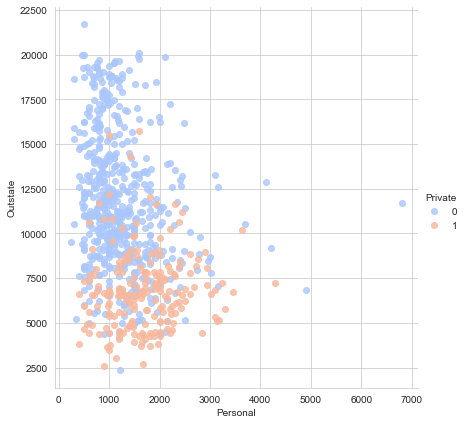

In [20]:
sns.set_style('whitegrid')
sns.lmplot(x='Personal',y='Outstate',data=df, hue='Private',
           palette='coolwarm',height=6,fit_reg=False)